In [8]:
import numpy as np 
import pandas as pd 

# Import Libraries

In [9]:
# !pip install tqdm


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
# %pip install matplotlib
# %pip install random

import nltk                               
import matplotlib.pyplot as plt           
import random  

import re                                
import string                            

from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer       
from nltk.tokenize import TweetTokenizer

from tqdm import tqdm

# Read Twitter Sentiment Analysis Data

In [11]:
df_train = pd.read_csv("train.csv",index_col = "id")
df_test = pd.read_csv("test.csv",index_col = "id")

df_train.head()

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


# Explore Data

#### We'll use NLTK Package, an open-source Python library for natural language processing.

#### Total Number of Tweets

In [12]:
df_train.shape

(31962, 2)

#### Total Numeber of Negative Tweets

In [13]:
df_train[df_train["label"]==1].shape

(2242, 2)

#### Total Numeber of Positive Tweets

In [14]:
df_train[df_train["label"]==0].shape

(29720, 2)

#### Create a Pie Chart Between Number of Pos and Neg Tweets

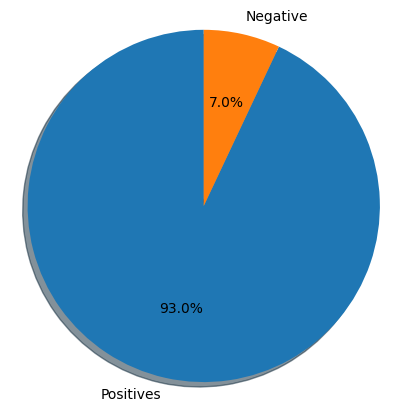

In [15]:
fig = plt.figure(figsize=(5, 5))
labels = 'Positives', 'Negative'
sizes = [df_train[df_train["label"]==0].shape[0], df_train[df_train["label"]==1].shape[0]] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  
plt.show()

#### There're a noticeable imbalancing in data

#### Split Training Data To All Positive and All Negative Tweets

In [16]:
df_neg = df_train[df_train["label"]==1]
df_neg.shape

(2242, 2)

In [17]:
df_pos = df_train[df_train["label"]==0]
df_pos.shape

(29720, 2)

# Preprocessing

## Steps:
#### 1. Tokenizing the Strings
#### 2. Lowercasing
#### 3. Removing Stopwords and Punctuations
#### 4. Stemming

In [18]:
df_neg.head()

,label,tweet
id,,
14,1,@user #cnn calls #michigan middle school 'buil...
15,1,no comment! in #australia #opkillingbay #se...
18,1,retweet if you agree!
24,1,@user @user lumpy says i am a . prove it lumpy.
35,1,it's unbelievable that in the 21st century we'...


In [19]:
def preprocessing(df):
    try:
        # Remove old style retweet text "RT"
        
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : re.sub(r'^RT[\s]+', '', x))
    
        # Remove Hyperlinks
        
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : re.sub(r'https?:\/\/.*[\r\n]*', '', x))
    
        # Remove Hashsign "#"
        
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : re.sub(r'#', '', x))

        # Tokenize the String
    
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : tokenizer.tokenize(x))
        
        # Remove stop words and punctuations
        
        stopwords_english = stopwords.words('english') 
        def remove_Stop_Punc(listt):
            clean = []
            for word in listt: # Go through every word in your tokens list
                if (word not in stopwords_english and  # remove stopwords
                    word not in string.punctuation):  # remove punctuation
                    clean.append(word)
            return clean
        
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : remove_Stop_Punc(x))
        
        # Stemming
        
        # Instantiate stemming class
        stemmer = PorterStemmer()
        def stemming_func(listt):
            stemmed = [] 

            for word in listt:
                stem_word = stemmer.stem(word)  # stemming word
                stemmed.append(stem_word)  # append to the list
            return stemmed
    
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : stemming_func(x))
        
        
    except:
        print("Already Preprocessed")
        
    
    
preprocessing(df_neg)
df_neg.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23568\1298959711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet"] = df.loc[:,"tweet"].apply(lambda x : re.sub(r'^RT[\s]+', '', x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23568\1298959711.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet"] = df.loc[:,"tweet"].apply(lambda x : re.sub(r'https?:\/\/.*[\r\n]*', '', x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23568\1298959711.py:13: SettingWithCopyWarning: 
A value is trying to be 

Already Preprocessed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23568\1298959711.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet"] = df.loc[:,"tweet"].apply(lambda x : tokenizer.tokenize(x))


,label,tweet
id,,
14,1,"[cnn, calls, michigan, middle, school, ', buil..."
15,1,"[no, comment, !, in, australia, opkillingbay, ..."
18,1,"[retweet, if, you, agree, !]"
24,1,"[lumpy, says, i, am, a, ., prove, it, lumpy, .]"
35,1,"[it's, unbelievable, that, in, the, 21st, cent..."


#### Applying Preprcessing on Both Train and Test Datasets

In [20]:
preprocessing(df_train)
print("------------------------------------------------------------")
preprocessing(df_test)

Already Preprocessed
------------------------------------------------------------
Already Preprocessed


# Building and Visualizing word frequencies

#### Representation using Frequency Dictionary

In [21]:
wordFreq = {}
for index,row in df_train.iterrows():
    for word in row["tweet"]:
        pair = (word , row["label"])
        if pair in wordFreq:
            wordFreq[pair]+=1
        else:
            wordFreq[pair]=1
wordFreq

{('when', 0): 1216,
 ('a', 0): 5858,
 ('father', 0): 196,
 ('is', 0): 3751,
 ('dysfunctional', 0): 1,
 ('and', 0): 4547,
 ('so', 0): 1893,
 ('selfish', 0): 13,
 ('he', 0): 433,
 ('drags', 0): 4,
 ('his', 0): 427,
 ('kids', 0): 196,
 ('into', 0): 180,
 ('dysfunction', 0): 3,
 ('.', 0): 11330,
 ('run', 0): 103,
 ('thanks', 0): 276,
 ('for', 0): 4247,
 ('lyft', 0): 5,
 ('credit', 0): 13,
 ('i', 0): 5615,
 ("can't", 0): 713,
 ('use', 0): 100,
 ('cause', 0): 70,
 ('they', 0): 645,
 ("don't", 0): 589,
 ('offer', 0): 25,
 ('wheelchair', 0): 3,
 ('vans', 0): 2,
 ('in', 0): 4224,
 ('pdx', 0): 3,
 ('disapointed', 0): 1,
 ('getthanked', 0): 2,
 ('bihday', 0): 836,
 ('your', 0): 1607,
 ('majesty', 0): 10,
 ('model', 0): 370,
 ('love', 0): 2653,
 ('u', 0): 1132,
 ('take', 0): 606,
 ('with', 0): 2404,
 ('all', 0): 1850,
 ('the', 0): 9354,
 ('time', 0): 1106,
 ('urð', 0): 325,
 ('\x9f', 0): 17082,
 ('\x93', 0): 764,
 ('±', 0): 527,
 ('!', 0): 13520,
 ('ð', 0): 15600,
 ('\x98', 0): 7207,
 ('\x99', 0):

# Feature Extraction

In [22]:
Xm = []
for index , row in df_train.iterrows():
    tweetFeatureList = []
    posFreq = 0
    negFreq = 0
    for word in row["tweet"]:
        if (word,0) in wordFreq:
            posFreq += wordFreq[(word,0)]
        if (word,1) in wordFreq:
            negFreq += wordFreq[(word,1)]
    tweetFeatureList.append(1)
    tweetFeatureList.append(posFreq)
    tweetFeatureList.append(negFreq)
    Xm.append(tweetFeatureList)

In [23]:
len(Xm)

31962

In [24]:
Xm

[[1, 34329, 3301],
 [1, 27863, 2141],
 [1, 2453, 89],
 [1, 366347, 8208],
 [1, 3325, 240],
 [1, 36741, 3116],
 [1, 11439, 1746],
 [1, 123796, 4691],
 [1, 109726, 5941],
 [1, 31426, 1138],
 [1, 24209, 1600],
 [1, 19183, 1597],
 [1, 48239, 1861],
 [1, 11910, 1589],
 [1, 18518, 1026],
 [1, 31929, 869],
 [1, 31212, 2134],
 [1, 19139, 1152],
 [1, 65742, 2285],
 [1, 27872, 2959],
 [1, 23915, 1955],
 [1, 1759, 60],
 [1, 60162, 4255],
 [1, 37769, 3094],
 [1, 26641, 1106],
 [1, 35434, 1342],
 [1, 250121, 5047],
 [1, 32953, 3152],
 [1, 150821, 1373],
 [1, 45457, 3431],
 [1, 71412, 5300],
 [1, 2353, 194],
 [1, 46949, 3248],
 [1, 46669, 3734],
 [1, 43327, 3944],
 [1, 55450, 4273],
 [1, 740, 28],
 [1, 19688, 1647],
 [1, 64447, 5799],
 [1, 25225, 1510],
 [1, 22449, 1828],
 [1, 89307, 4733],
 [1, 33056, 2767],
 [1, 109833, 2889],
 [1, 237, 3],
 [1, 20085, 1263],
 [1, 366347, 8208],
 [1, 5205, 412],
 [1, 355, 4],
 [1, 184317, 7392],
 [1, 10582, 888],
 [1, 231342, 3695],
 [1, 47063, 3647],
 [1, 12198, 

# Logistic Regression Model

#### Convert Xm Matrix into Pandas dataframe

In [25]:
data = pd.DataFrame(Xm,columns = ["Bias","PosFreq","NegFreq"])
data.head()

,Bias,PosFreq,NegFreq
0,1,34329,3301
1,1,27863,2141
2,1,2453,89
3,1,366347,8208
4,1,3325,240


In [26]:
df_train.reset_index(drop=True,inplace=True)

In [27]:
data["Sentiment"] = df_train["label"]

In [28]:
data.head()

,Bias,PosFreq,NegFreq,Sentiment
0,1,34329,3301,0
1,1,27863,2141,0
2,1,2453,89,0
3,1,366347,8208,0
4,1,3325,240,0


#### Split Data into Features and Label

In [29]:
X = data.drop("Sentiment",axis = 1)
y = data["Sentiment"]

#### Split data into Train and Validations

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)

In [31]:
y_train = y_train.to_numpy(dtype='float64')

In [32]:
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [33]:
m = X_train.shape[0]
alpha = 1e-8
theta = np.zeros((3, 1))
for i in range(0, 1500):
    z = np.dot(X_train,theta)
    Ypred = 1/(1 + np.exp(-z))
    cost = -1/m * (np.dot(y_train.T, np.log(Ypred)) + np.dot((1-y_train).T,np.log(1-Ypred)))
    theta = theta - (alpha/m) * np.dot(X_train.T,(Ypred-y_train))
theta

array([[-1.10529842e-06],
       [-1.01486227e-04],
       [ 4.68000927e-04]])

In [34]:
y_test = y_test.to_numpy(dtype='float64')
y_test = np.reshape(y_test,(y_test.shape[0],1))

# Test Logistic Regression Model

In [35]:
ypredicted = []
ztest =np.dot(X_test,theta)
Ytest = 1/(1 + np.exp(-ztest))
for i in Ytest:
    if i > 0.5:
        ypredicted.append(1.0)
    else :
        ypredicted.append(0.0)
accuracy = (ypredicted==np.squeeze(y_test)).sum()/len(X_test)

In [36]:
accuracy

0.9282027217268888

# Naive Bayes Model

In [37]:
X = df_train.drop("label",axis = 1)
y = df_train["label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)

In [38]:
ProbPos = y_train[y_train==0].shape[0] / y_train.shape[0]
ProbPos


0.9301497907622511

In [39]:
ProbNeg =  y_train[y_train==1].shape[0] / y_train.shape[0]
ProbNeg

0.06985020923774883

In [40]:
import math
logPrior = math.log(ProbPos/ProbNeg) 

In [41]:
logPrior

2.588992557285253

In [42]:
Xm = []
V = set([pair[0] for pair in wordFreq.keys()])
NPos = NNeg = 0
for index , row in X_train.iterrows():
     for word in row["tweet"]:
        if (word,0) in wordFreq:
            NPos += wordFreq[(word,0)]
        if (word,1) in wordFreq:
            NNeg += wordFreq[(word,1)]
          
            
len(V)

42837

In [43]:
likelihoodMatrix= {}
for index , row in X_train.iterrows():
    ProbWPos = 0
    ProbWNeg = 0
    for word in row["tweet"]:
        if (word,0) in wordFreq:
            ProbWPos = (wordFreq[(word,0)]+1)/(NPos + len(V))
        else:
            ProbWPos = (0+1)/(NPos + len(V))
        if (word,1) in wordFreq:
            ProbWNeg = (wordFreq[(word,1)]+1)/(NNeg + len(V))
            
        else:
            ProbWNeg = (0+1)/(NNeg + len(V))
        LogLikelihood = math.log(ProbWPos / ProbWNeg)
        likelihoodMatrix[word] = LogLikelihood
likelihoodMatrix

{'because': -1.591479147228866,
 "i've": -0.15477653399111171,
 'been': -0.6117994517641264,
 'paying': -1.4227296679804549,
 'attention': -1.4968376401341768,
 'for': -0.1223998921708114,
 'the': -0.5529103620567731,
 'past': -0.8631138800450322,
 'year': -0.599529359172312,
 '/8': -3.656321889487549,
 'years': -0.54837762532663,
 '.': -0.5613001232777522,
 "he's": -0.9970618525547711,
 'a': -0.713928946840506,
 'â': -0.6021329848880624,
 '\x80': -1.179083454339728,
 '¦': -1.0604234016211673,
 'raft': -2.2700275283676583,
 'building': -0.4782680591396037,
 'at': 0.08134772879581913,
 'salford': -2.2700275283676583,
 'quays': -2.2700275283676583,
 'as': -0.7788991059321876,
 'pa': -0.8927018372305284,
 'of': -0.8756140428092636,
 'gmw': -2.2700275283676583,
 'fun': 1.992652348673657,
 'outdoors': -0.5652794361292335,
 'badge': -1.171415239699549,
 'guides': -1.8645624202594944,
 'friday': 3.286800533331879,
 'ð': 1.6947033110555305,
 '\x9f': 1.7392392701002073,
 '\x92': 2.0079004204688

In [44]:
len(likelihoodMatrix)

37175

# Train Naive Bayes
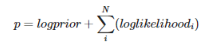

In [45]:
YTrainPred = []
for tweet in X_train["tweet"]:
    p = 0
    for word in tweet: 
        p += (logPrior + likelihoodMatrix[word])
    if p > 0:
        YTrainPred.append(0)
    else: 
        YTrainPred.append(1)

# Test Naive Bayes

In [46]:
error = np.mean(np.absolute(YTrainPred-y_train))
# Accuracy is 1 minus the error
accuracy = 1-error


In [47]:
accuracy


0.9371895654894599